# **What is Unsupervised Learning?**

Unsupervised learning is a type of machine learning where the algoithm learn patterns from data without being explicitly told what to look for or what the patterns mean.

**Let's generate a two-dimensional dataset containing four distinct blobs. To emphasize that this is an unsupervised algorithm, we will the labels out of the visualization.**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # for plot styling
import numpy as np

[]

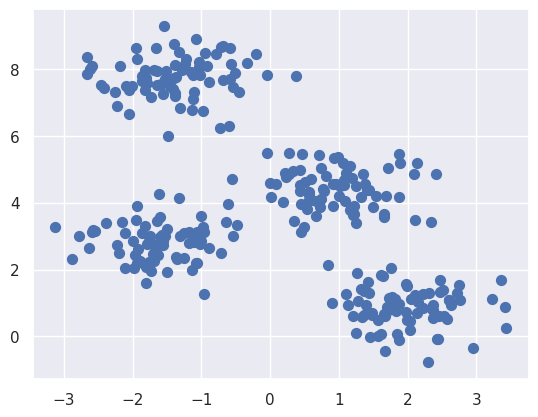

In [4]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 300, centers=4, cluster_std =0.60, random_state=0)
plt.scatter(X[:,0],X[:,1], s=50)
plt.plot()

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically:

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

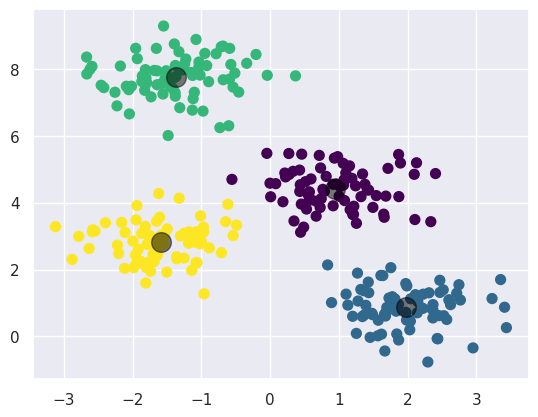

In [6]:
plt.scatter(X[:,0],X[:,1],c = y_kmeans, s=50, cmap ='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s = 200, alpha =0.5)

In [7]:
kmeans.cluster_centers_

array([[ 0.94973532,  4.41906906],
       [ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263]])

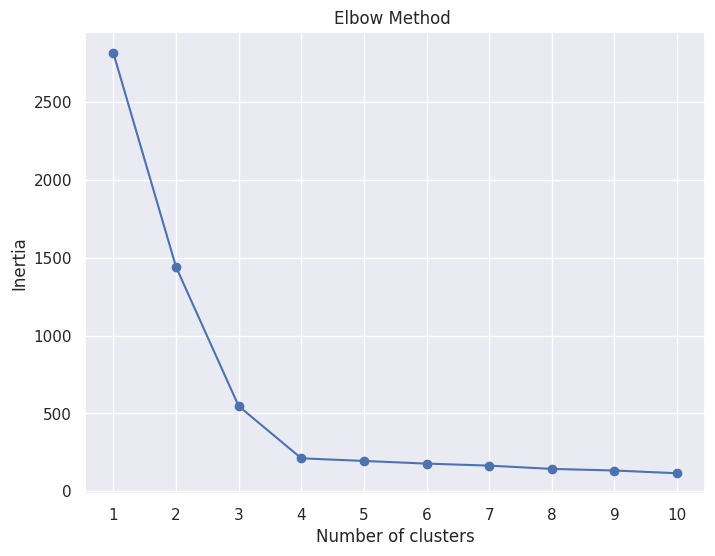

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

# Generate some sample data for demonstration
np.random.seed(42)
data, _= make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Applying k-means with different number of clusters
intertia =[]  # List to store the intertia for each k
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
  intertia.append(kmeans.inertia_)

#Plotting the Elbow Method Graph
plt.figure(figsize=(8,6))
plt.plot(range(1,11), intertia, marker ='o')
plt.title('Elbow Method ')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,11))
plt.show()

# **Implementation of K-Means Clustering:**

Gucci, the renowned Italian luxury brand, is planning to open a new boutique in a high-end shopping mall. As part of their grand opening, they want to create a buzz and attract the right clientele to their store. They've partnered with the mall's management to use targeted marketing strategies to maximize their reach and effectiveness.

As the data analyst for the mall, you have access to a comprehensive database of mall visitors, which includes details such as annual income, spending scores (indicating how much they spend in the mall and how often), visit frequency, and purchase history. Your task is to analyze this data to identify the ideal customers for Gucci's targeted marketing campaign. The goal is to send personalized push notifications to these customers, informing them about Gucci's new store opening, exclusive offers, and perhaps an invite to a special inaugural event.

Given Gucci's positioning as a luxury brand, the target demographic is likely to be individuals with high disposable income and a propensity for spending on high-end fashion and luxury goods.

Initial Hypothesis : Annual Income Vs Spending Score

**Dataset Link:** https://drive.google.com/file/d/1yBkTe9-gxSxlSm0PGfBmi_ajFt8sxm_b/view?usp=sharing

In [13]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
# loading the dataset
credit_df = pd.read_csv("/content/Mall_Customers.csv")
credit_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [17]:
credit_df.shape

(200, 5)

In [18]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
# check for missing values
credit_df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [20]:
# normalize the features
from sklearn.preprocessing import StandardScaler, normalize
X = credit_df.iloc[:,3:5].values #Columns of interest

X = StandardScaler().fit_transform(X)
X = normalize(X)
print(X)

[[-0.97013572 -0.24256276]
 [-0.82401048  0.56657455]
 [-0.7039784  -0.71022139]
 [-0.85305371  0.52182312]
 [-0.97279192 -0.23168055]
 [-0.85658242  0.51601024]
 [-0.68749685 -0.72618736]
 [-0.69078646  0.72305883]
 [-0.65452065 -0.75604412]
 [-0.88229014  0.47070597]
 [-0.74851489 -0.66311798]
 [-0.64199257  0.76671086]
 [-0.74971714 -0.66175843]
 [-0.82998676  0.55778309]
 [-0.73123898 -0.68212137]
 [-0.81069137  0.58547374]
 [-0.93140492 -0.36398472]
 [-0.92647723  0.37635083]
 [-0.86725326 -0.49786723]
 [-0.61137179  0.7913435 ]
 [-0.92103954 -0.38946909]
 [-0.84445476  0.53562689]
 [-0.61183513 -0.79098532]
 [-0.83762959  0.54623866]
 [-0.66245749 -0.74909951]
 [-0.70946363  0.70474205]
 [-0.86933095 -0.49423041]
 [-0.94753177  0.3196616 ]
 [-0.85037495 -0.52617719]
 [-0.64462638  0.76449777]
 [-0.54520069 -0.83830556]
 [-0.79661478  0.6044873 ]
 [-0.50591796 -0.8625816 ]
 [-0.54395835  0.83911222]
 [-0.59925019 -0.80056181]
 [-0.6605323   0.75079763]
 [-0.61823317 -0.78599475]
 

### **Train the Model:**

In [22]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(X)
    visualizer.poof()

For n_clusters = 2, silhouette score is 0.46976851902200534


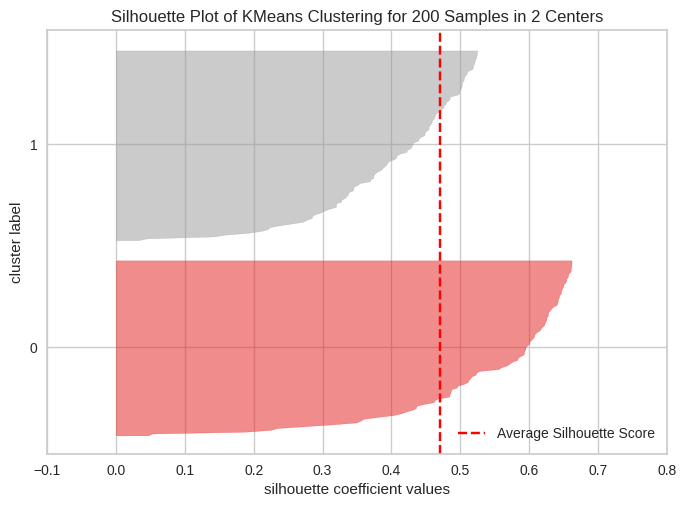

For n_clusters = 3, silhouette score is 0.6017286682887614


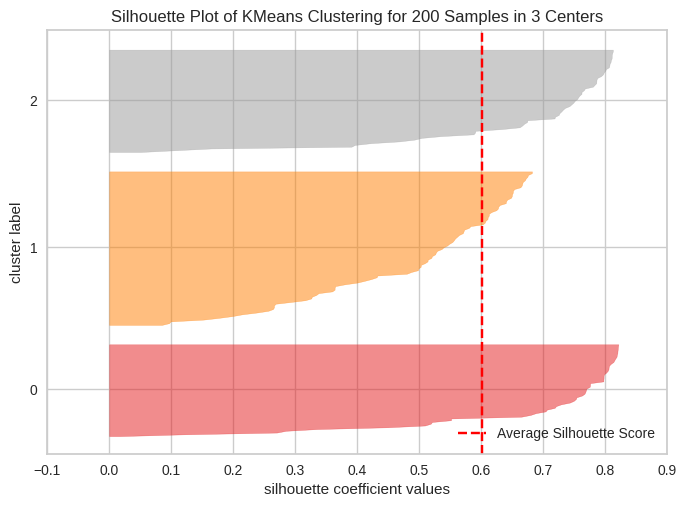

For n_clusters = 4, silhouette score is 0.6616413670429191


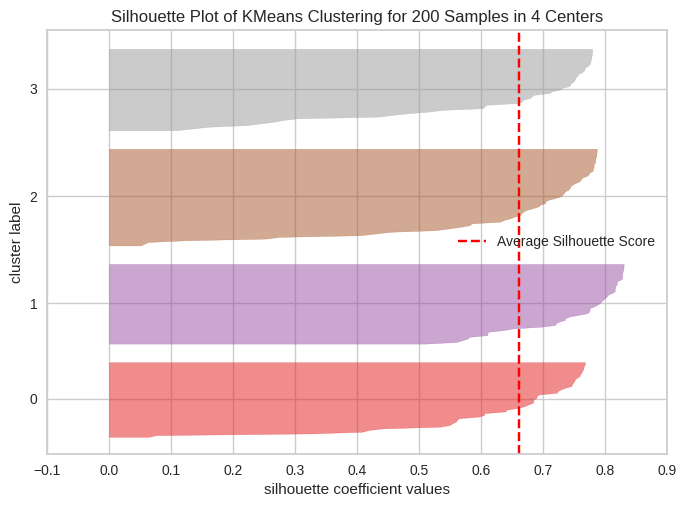

For n_clusters = 5, silhouette score is 0.6063807888396361


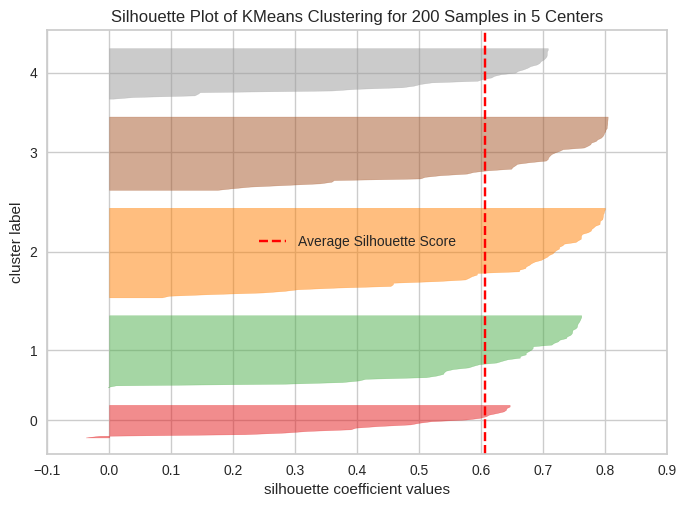

For n_clusters = 6, silhouette score is 0.584461106092741


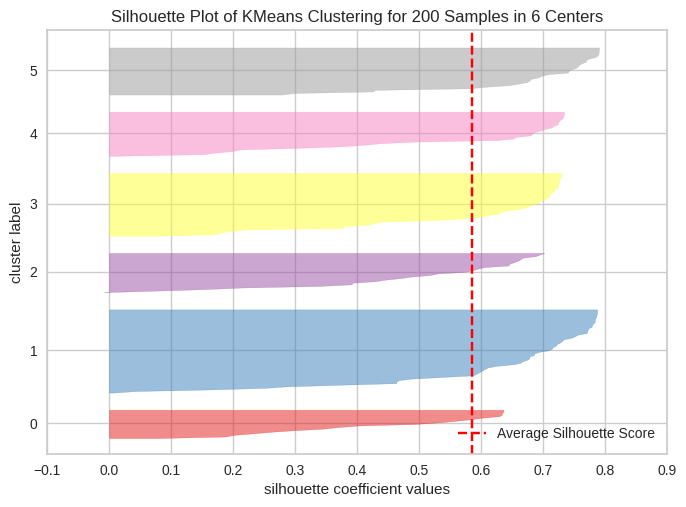

For n_clusters = 7, silhouette score is 0.5811029822879261


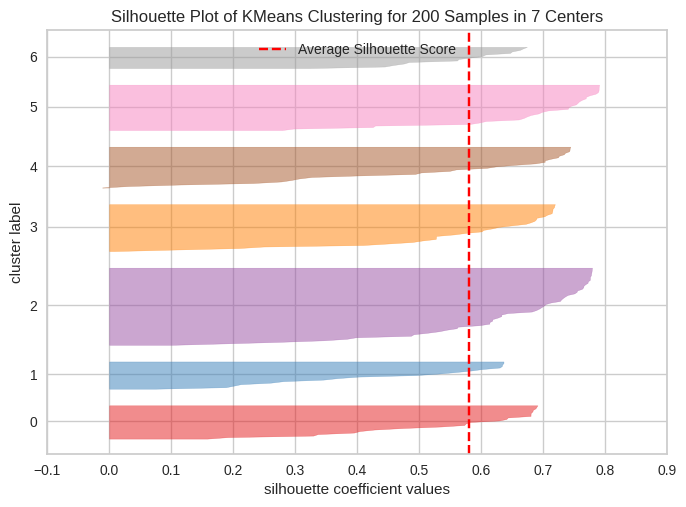

For n_clusters = 8, silhouette score is 0.5559048053349808


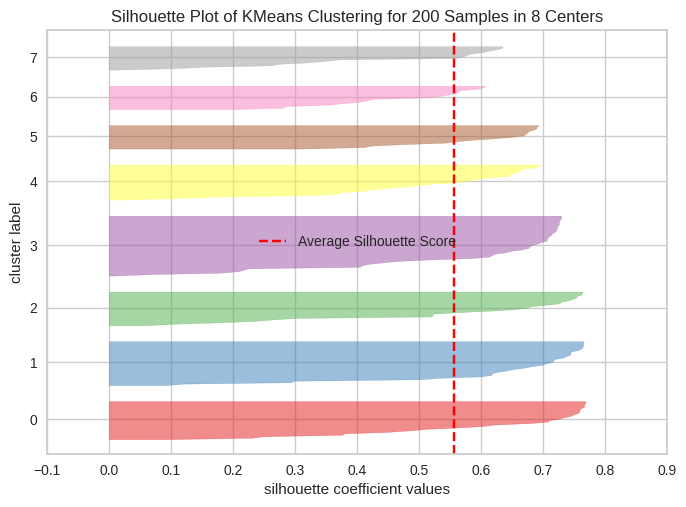

For n_clusters = 9, silhouette score is 0.566967052752044


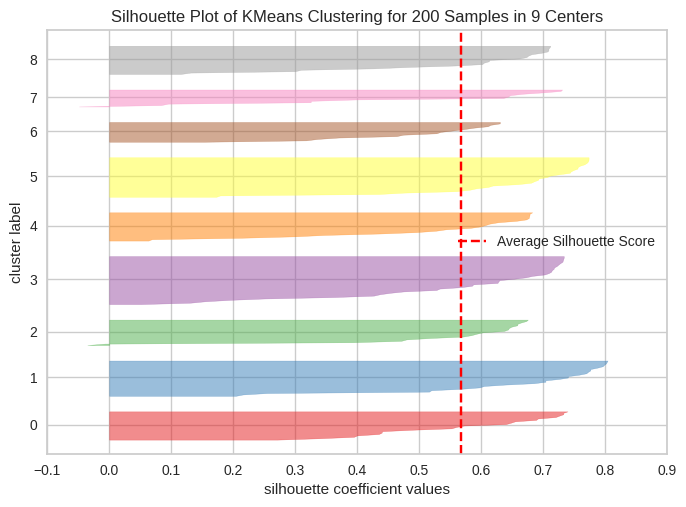

In [23]:
silhouette_analysis(10)

### **Elbow Method:**

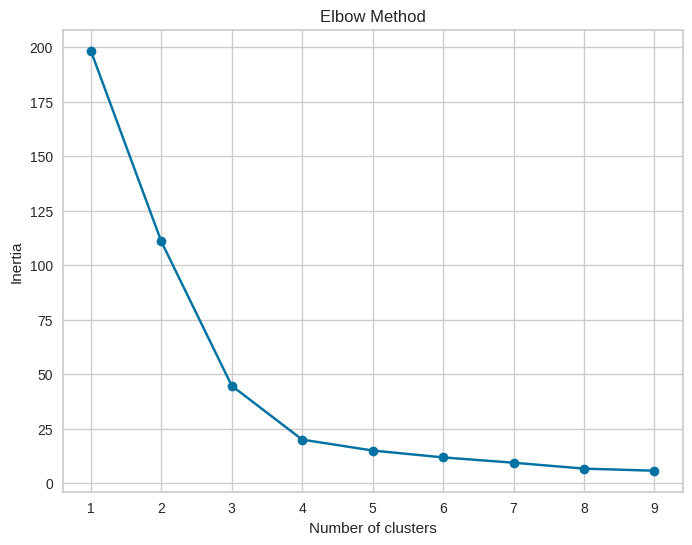

In [25]:
# Applying k-means with different number of clusters
inertia = [] # List to store the inertia for each k
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
  inertia.append(kmeans.inertia_)

# Plotting the Elbow Method Graph
plt.figure(figsize =(8,6))
plt.plot(range(1,10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1,10))
plt.show()

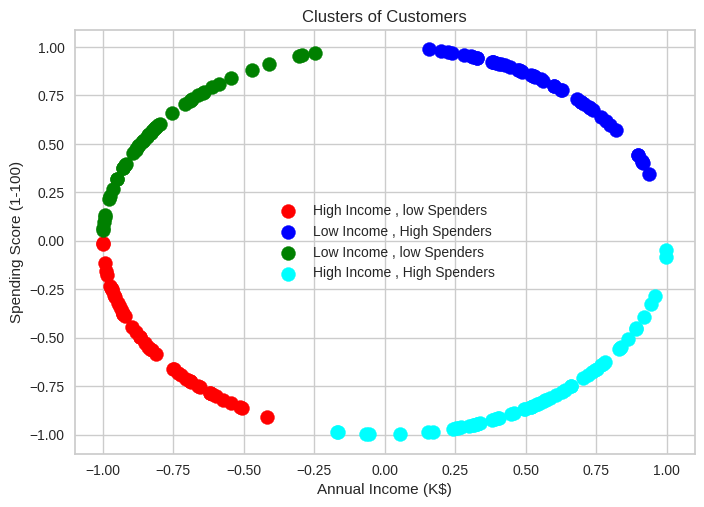

In [31]:
# Visualizing the cluster(two dimensions only)
plt.scatter(X[cluster_labels == 0,0],X[cluster_labels == 0,1], s = 100, c = 'red', label = 'High Income , low Spenders')
plt.scatter(X[cluster_labels == 1,0],X[cluster_labels == 1,1], s = 100, c = 'blue', label = 'Low Income , High Spenders')
plt.scatter(X[cluster_labels == 2,0],X[cluster_labels == 2,1], s = 100, c = 'green', label = 'Low Income , low Spenders')
plt.scatter(X[cluster_labels == 3,0],X[cluster_labels == 3,1], s = 100, c = 'cyan', label = 'High Income , High Spenders')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **Hierarchical Clustering**

Hierarchical clustering is another popular unsupervised learning algorithm used for clustering. Unlike K-means clustering, which requires the number of clusters to be specified beforehand, hierarchical clustering does not require any prior knowledge of the number of clusters. Instead, it creates a hierarchy of clusters by successively merging or dividing existing clusters based on their similarity.

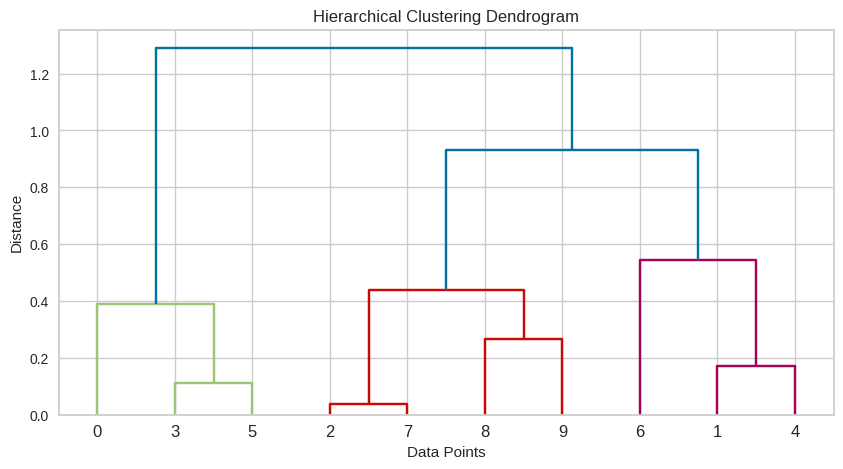

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate synthetic Data
np.random.seed(42)
X = np.random.rand(10,2)

# Perform Hierarchical clustering
Z = linkage(X, method = 'ward')

# Plot the dendogram
plt.figure(figsize =(10,5))
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()